# BEAM WIDTH

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib widget

In [2]:
df = pd.read_csv('/home/tomi/Documents/academicos/facultad/tesis/tesis/data_analysis/peak_counting/data/beam_width.csv')

In [3]:
df.X = df.X.astype(float)
df.W = df.W.astype(float)
df

,X,W
0,0.00,33.800
1,0.25,33.600
2,0.50,6.610
3,0.75,1.000
4,1.00,0.880
...,...,...
79,0.71,1.055
80,0.72,1.045
81,0.73,1.040
82,0.74,1.033


$$A \times \text{erf}\left(\frac{z-\mu}{\sigma}\right) + b$$

[  0.45218141   0.09754677 -16.41195711  17.40316258] [0.00105545 0.00199391 0.11519529 0.10128538]


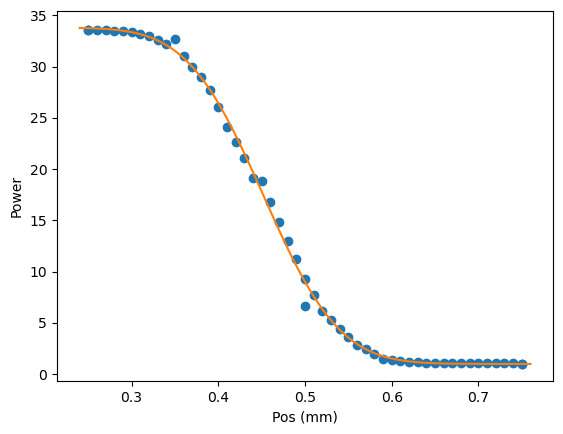

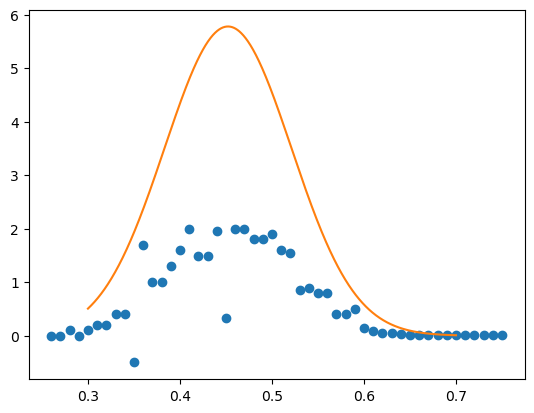

In [25]:
from scipy.optimize import curve_fit
import scipy
import scipy.stats
%matplotlib inline

def func(z,a,b, c, d):
   return c*scipy.special.erf((z-a)/(b)) + d

z = np.linspace(0.24, 0.76, 1000)
filter = np.logical_and(df.X > 0.24, df.X < 0.76)
x = df.X[filter]
y = df.W[filter]
popt, pcov = curve_fit(func, x, y, p0=[0.45, 0.1, np.max(df.W[filter]), 0])
a, b, c, d = popt
print(popt, np.sqrt(np.diag(pcov)))


plt.close('all')
#plt.plot(x, func(x, 0.45, 0.1, 1, 0), 'o')
plt.plot(x, y, 'o')
#plt.plot(df.X[1:], np.diff(-df.W + 1), 'o')

plt.plot(z, func(z, a, b, c, d))
plt.xlabel("Pos (mm)")
plt.ylabel("Power (mW)")

#plt.xlim([0.24,0.76])
plt.show()

yp = y 
yp = -np.diff(yp)
xp = x[1:][np.abs(yp) < 5]
xg = np.linspace(0.3, 0.7, 1000)
yp = yp[np.abs(yp) < 5]
plt.plot(xp, yp, 'o')
yg = scipy.stats.norm.pdf(xg, loc=0.45218, scale=0.097547/np.sqrt(2))
plt.plot(xg, yg)
plt.show()

In [88]:


from scipy.optimize import curve_fit
import scipy

def func(z,a,b, c, d):
   return c*scipy.special.erf((z-a)/b) + d

def func2(z,a,b, c, d, e):
   return e - c*scipy.special.erf((z-a)/b) + d

z = np.linspace(0.24, 0.76, 1000)
filter = np.logical_and(df.X > 0.24, df.X < 0.76)
x = df.X[filter]
y = -df.W[filter]/np.max(df.W[filter]) + 1/2
print(np.max(df.W[filter]))
#y = df.W[filter]
#popt, pcov = curve_fit(func, x, y, p0=[0.45, 0.1, 0.5, 0])
#a, b, c, d = popt
#print(popt, np.sqrt(np.diag(pcov)))

popt, pcov = curve_fit(func, x, y, p0=[0.45, 0.1, 0.5, 0])
#a, b, c, d, e = popt
print(popt, np.sqrt(np.diag(pcov)))


plt.close('all')
#plt.plot(x, func(x, 0.45, 0.1, 1, 0), 'o')
#plt.plot(x, y, 'o')
#plt.plot(df.X[1:], np.diff(-df.W + 1), 'o')

#plt.plot(z, func(z, a, b, c, d))

plt.ylabel("-Power/Max + 1/2")
plt.xlabel("Pos (mm)")

#plt.xlim([0.24,0.76])
plt.show()

33.6


ValueError: not enough values to unpack (expected 5, got 4)